# Load and Prepare the Data
Read the CSV files using pandas and organize the data for plotting.

In [9]:
# Import pandas for data handling
import pandas as pd

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Load the CSV files into pandas DataFrames
rdf4j_data = pd.read_csv('/Users/freddylimpens/src/corese-benchmark/out/rdf4j.5.1.2_loading-metrics.csv')
corese_data = pd.read_csv('/Users/freddylimpens/src/corese-benchmark/out/corese.4.6.3_loading-metrics.csv')
jena_data = pd.read_csv('/Users/freddylimpens/src/corese-benchmark/out/jena.4.10.0_loading-metrics.csv')

# Add a column to indicate the triplestore name for each dataset
#rdf4j_data['triplestore'] = 'rdf4j.5.1.2'
#corese_data['triplestore'] = 'corese.4.6.3'
#jena_data['triplestore'] = 'jena.4.10.0'

# Concatenate the two datasets into a single DataFrame for easier comparison
combined_data = pd.concat([rdf4j_data, corese_data, jena_data], ignore_index=True)

# Convert graph_size to millions (10^6) for better readability in plots
combined_data['graph_size_millions'] = combined_data['graph_size'] / 1e6

# Display the first few rows of the combined dataset to verify
combined_data.head(n=20)

,triplestoreName,file,loading_time_seconds,graph_size,memory_used_mb,graph_size_millions
0,rdf4j.5.1.2,Department4.nt,3.47,1233162,455.82,1.233162
1,rdf4j.5.1.2,Department0.nt,6.68,2465753,1073.71,2.465753
2,rdf4j.5.1.2,Department1.nt,10.12,3706660,1524.60,3.706660
3,rdf4j.5.1.2,Department5.nt,14.32,4958334,2136.97,4.958334
4,rdf4j.5.1.2,Department2.nt,18.37,6210468,2823.78,6.210468
5,rdf4j.5.1.2,Department6.nt,23.23,7467447,2822.73,7.467447
6,rdf4j.5.1.2,Department7.nt,28.06,8713079,3613.36,8.713079
7,rdf4j.5.1.2,Department3.nt,33.35,9966182,3613.36,9.966182
8,rdf4j.5.1.2,Department8.nt,39.19,11215258,3615.46,11.215258
9,rdf4j.5.1.2,Department9.nt,45.49,12479099,3284.11,12.479099


# Create Dual-Axis Plot with Multiple Series
Create a figure with two y-axes and plot loading time and memory usage for both triplestores.

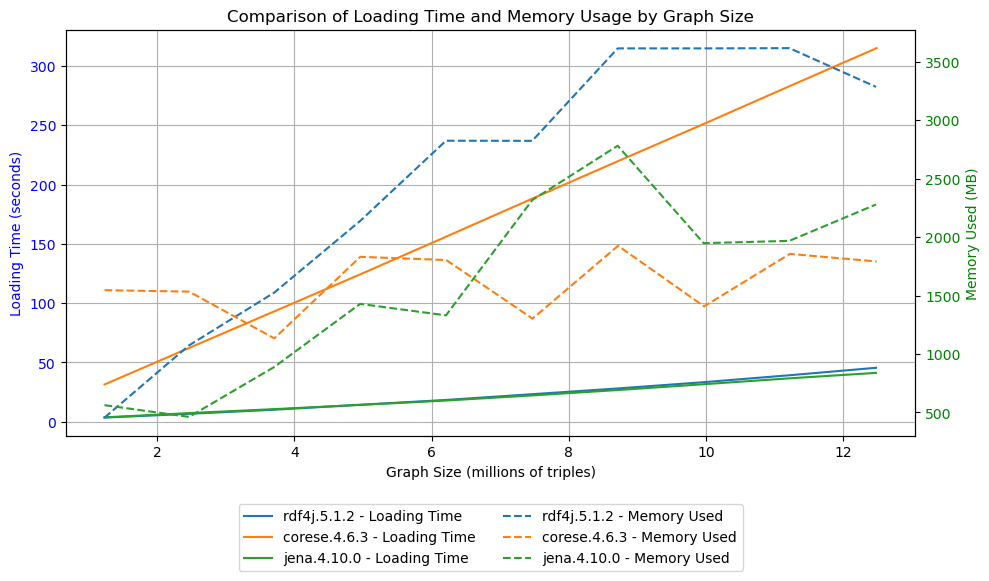

In [12]:
# Create a figure with two y-axes and plot loading time and memory usage for both triplestores
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot loading_time_seconds on the left y-axis
for triplestoreName in combined_data['triplestoreName'].unique():
    subset = combined_data[combined_data['triplestoreName'] == triplestoreName]
    ax1.plot(subset['graph_size_millions'], subset['loading_time_seconds'], label=f'{triplestoreName} - Loading Time')

ax1.set_xlabel('Graph Size (millions of triples)')
ax1.set_ylabel('Loading Time (seconds)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for memory_used_mb
ax2 = ax1.twinx()
for triplestore in combined_data['triplestoreName'].unique():
    subset = combined_data[combined_data['triplestoreName'] == triplestore]
    ax2.plot(subset['graph_size_millions'], subset['memory_used_mb'], linestyle='--', label=f'{triplestore} - Memory Used')

ax2.set_ylabel('Memory Used (MB)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and grid
plt.title('Comparison of Loading Time and Memory Usage by Graph Size')
ax1.grid(True)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Show the plot
plt.tight_layout()
plt.show()